# Forecasting Web Traffic

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np

import seaborn as sns
import scipy.stats as ss
import pylab as pl
from statsmodels.tsa.arima_model import ARMAResults
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsa
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf, acovf
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.ar_model import AR

import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import HTML, display
import tabulate
from arch import arch_model

In [2]:
# Import .csv files
# Python Wikipedia page
sampledata = pd.read_csv("C:/Users/Diana/Documents/University of Waterloo/" + \
                   "4th Year/ECON 423/Final Project/Facebook_Sample.csv")

sampledatasort=sampledata.sort_values(["Facebook"])
print(sampledatasort)

           Date  Facebook
40    8/10/2015        17
48    8/18/2015        17
71    9/10/2015        17
57    8/27/2015        18
127   11/5/2015        18
51    8/21/2015        18
47    8/17/2015        18
32     8/2/2015        19
52    8/22/2015        20
55    8/25/2015        20
61    8/31/2015        20
578   1/29/2017        21
54    8/24/2015        21
65     9/4/2015        21
35     8/5/2015        21
68     9/7/2015        21
74    9/13/2015        21
72    9/11/2015        22
60    8/30/2015        22
38     8/8/2015        22
41    8/11/2015        22
5      7/6/2015        22
75    9/14/2015        22
56    8/26/2015        22
145  11/23/2015        22
45    8/15/2015        22
42    8/12/2015        22
575   1/26/2017        23
44    8/14/2015        23
137  11/15/2015        23
..          ...       ...
660   4/21/2017       104
609    3/1/2017       104
327   5/23/2016       106
596   2/16/2017       107
333   5/29/2016       109
605   2/25/2017       110
337    6/2/2

## Basic Data

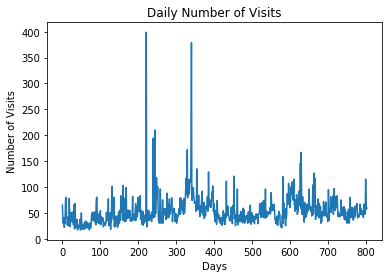

In [3]:
plt.plot(sampledata["Facebook"])
plt.title("Daily Number of Visits")
plt.xlabel("Days")
plt.ylabel("Number of Visits")
plt.show()

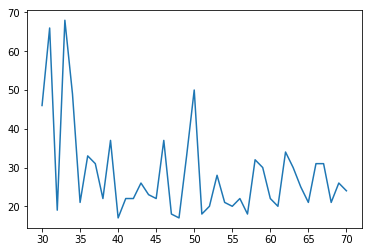

In [4]:
plt.plot(sampledata["Facebook"][30:71])
plt.show()

Mention stuff in units and say that the actual units are not disclosed by the publisher of the code.

There is a weekly trend.

In [5]:
def basic(df,column, histitle,title,titlelist): 
    # histogram
    df.hist(column=column, bins=20)
    pl.title(histitle)
    # ACF plot
    data_acfplot = tsa.plot_acf(x=df[column], ax=None, 
                                lags=25, alpha=.05, use_vlines=True, 
                                unbiased=False,fft=False, title=title, 
                                zero=False, vlines_kwargs=None)
    mean_data=np.mean(df[column])
    var_data=np.var(df[column])
    skew_data=df[column].skew(skipna=True)
    kurtosis_data=df[column].kurtosis()
    print(titlelist)
    print("Mean: " + str(mean_data))
    print("Variance: " + str(var_data))
    print("Skewness(scipy): " + str(skew_data))
    print("Kurtosis: " + str(kurtosis_data))
    print("")

---Facebook Daily Visits---
Mean: 53.612702366127024
Variance: 820.3991910782885
Skewness(scipy): 5.00691203231403
Kurtosis: 48.63380282083746



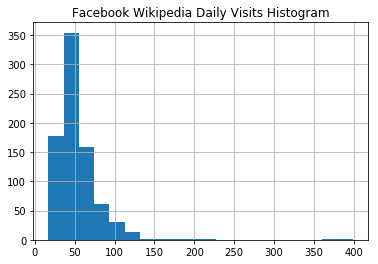

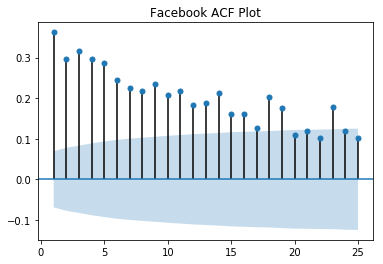

In [6]:
basic(sampledata,"Facebook", "Facebook Wikipedia Daily Visits Histogram",
      "Facebook ACF Plot","---Facebook Daily Visits---")

## Change Data

In [7]:
sampledata["FBChange"] = 100*(np.log(sampledata["Facebook"]) - \
                        np.log(sampledata["Facebook"].shift(1)))
sampledata = sampledata.iloc[1:]
print(len(sampledata["FBChange"]))

802


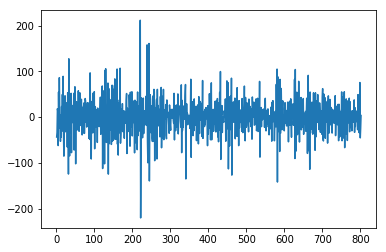

In [8]:
plt.plot(sampledata["FBChange"])

In [9]:
for i in range(1,5):
    for j in range(1,5):
        garch = arch_model(sampledata["FBChange"], p=i, q=j)
        garch_resid = garch.fit(disp='off')
        print(garch_resid.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:               FBChange   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -4063.77
Distribution:                  Normal   AIC:                           8135.54
Method:            Maximum Likelihood   BIC:                           8154.29
                                        No. Observations:                  802
Date:                Mon, Dec 10 2018   Df Residuals:                      798
Time:                        02:44:17   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3932      1.020      0.386      0.700 [ -1.606,  2.39

                     Constant Mean - GARCH Model Results                      
Dep. Variable:               FBChange   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -4063.65
Distribution:                  Normal   AIC:                           8139.30
Method:            Maximum Likelihood   BIC:                           8167.43
                                        No. Observations:                  802
Date:                Mon, Dec 10 2018   Df Residuals:                      796
Time:                        02:44:18   Df Model:                            6
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3958      1.023      0.387      0.699 [ -1.609,  2.40

                     Constant Mean - GARCH Model Results                      
Dep. Variable:               FBChange   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -4063.30
Distribution:                  Normal   AIC:                           8144.60
Method:            Maximum Likelihood   BIC:                           8186.79
                                        No. Observations:                  802
Date:                Mon, Dec 10 2018   Df Residuals:                      793
Time:                        02:44:18   Df Model:                            9
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3683      1.013      0.363      0.716 [ -1.618,  2.35

                     Constant Mean - GARCH Model Results                      
Dep. Variable:               FBChange   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -4063.30
Distribution:                  Normal   AIC:                           8146.60
Method:            Maximum Likelihood   BIC:                           8193.47
                                        No. Observations:                  802
Date:                Mon, Dec 10 2018   Df Residuals:                      792
Time:                        02:44:18   Df Model:                           10
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3682      1.266      0.291      0.771 [ -2.113,  2.85

---Facebook Daily Visits---
Mean: -0.01207603815335625
Variance: 1694.9150341390537
Skewness(scipy): -0.07505160617431292
Kurtosis: 2.6043402578909682



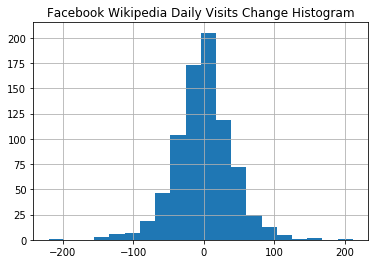

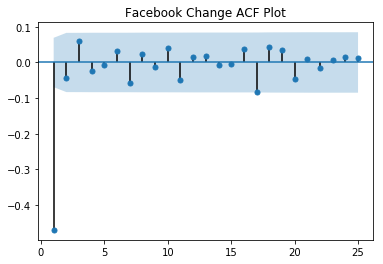

In [10]:
basic(sampledata, "FBChange", "Facebook Wikipedia Daily Visits Change Histogram","Facebook Change ACF Plot","---Facebook Daily Visits---")

Not really autocorrelated. Meaning number of visits from yesterday's data doesn't determine the number of visits of today's data. Nothing too interesting with first differenced data.

## Stationarity

In [11]:
result=smt.adfuller(sampledata["Facebook"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.964697
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


Data is stationary.

In [27]:
result=smt.adfuller(sampledata["FBChange"])
print('ADF Statistic: %f' % result[0])
print('p-value: %s' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.812116
p-value: 8.810406134104259e-22
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


Same with this one.

## Model

In [13]:
for i in range(0,11):
    for j in range(0,11):
        model = smt.ARMA(sampledata["Facebook"], order=(i,j))
        model_fit = model.fit(disp=0, method='mle', solver='nm')
        print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:               Facebook   No. Observations:                  802
Model:                     ARMA(0, 0)   Log Likelihood               -3829.036
Method:                           css   S.D. of innovations             28.658
Date:                Mon, 10 Dec 2018   AIC                           7662.071
Time:                        02:44:19   BIC                           7671.445
Sample:                             0   HQIC                          7665.672
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.5985      1.012     52.966      0.000      51.615      55.582
                              ARMA Model Results                              
Dep. Variable:               Facebook   No. Observat

                              ARMA Model Results                              
Dep. Variable:               Facebook   No. Observations:                  802
Model:                     ARMA(0, 5)   Log Likelihood               -3747.465
Method:                           mle   S.D. of innovations             25.882
Date:                Mon, 10 Dec 2018   AIC                           7508.930
Time:                        02:44:19   BIC                           7541.740
Sample:                             0   HQIC                          7521.533
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             53.5983      1.707     31.405      0.000      50.253      56.943
ma.L1.Facebook     0.2348      0.035      6.636      0.000       0.165       0.304
ma.L2.Facebook     0.1507      0.036

C:\Users\Diana\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:               Facebook   No. Observations:                  802
Model:                     ARMA(0, 7)   Log Likelihood               -3741.873
Method:                           mle   S.D. of innovations             25.701
Date:                Mon, 10 Dec 2018   AIC                           7501.746
Time:                        02:44:21   BIC                           7543.930
Sample:                             0   HQIC                          7517.950
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             53.5920      1.876     28.570      0.000      49.915      57.268
ma.L1.Facebook     0.2359      0.035      6.666      0.000       0.167       0.305
ma.L2.Facebook     0.1549      0.036

C:\Users\Diana\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:               Facebook   No. Observations:                  802
Model:                     ARMA(0, 8)   Log Likelihood               -3740.858
Method:                           mle   S.D. of innovations             25.669
Date:                Mon, 10 Dec 2018   AIC                           7501.717
Time:                        02:44:23   BIC                           7548.588
Sample:                             0   HQIC                          7519.720
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             53.5705      1.924     27.850      0.000      49.800      57.341
ma.L1.Facebook     0.2304      0.036      6.449      0.000       0.160       0.300
ma.L2.Facebook     0.1524      0.037

C:\Users\Diana\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:               Facebook   No. Observations:                  802
Model:                     ARMA(0, 9)   Log Likelihood               -3738.426
Method:                           mle   S.D. of innovations             25.591
Date:                Mon, 10 Dec 2018   AIC                           7498.853
Time:                        02:44:24   BIC                           7550.411
Sample:                             0   HQIC                          7518.657
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             53.6737      1.985     27.035      0.000      49.783      57.565
ma.L1.Facebook     0.2281      0.036      6.371      0.000       0.158       0.298
ma.L2.Facebook     0.1520      0.036

C:\Users\Diana\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:               Facebook   No. Observations:                  802
Model:                    ARMA(0, 10)   Log Likelihood               -3738.726
Method:                           mle   S.D. of innovations             25.601
Date:                Mon, 10 Dec 2018   AIC                           7501.451
Time:                        02:44:27   BIC                           7557.697
Sample:                             0   HQIC                          7523.056
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              53.6545      1.980     27.093      0.000      49.773      57.536
ma.L1.Facebook      0.2202      0.036      6.120      0.000       0.150       0.291
ma.L2.Facebook      0.1430      

                              ARMA Model Results                              
Dep. Variable:               Facebook   No. Observations:                  802
Model:                     ARMA(1, 3)   Log Likelihood               -3726.939
Method:                           mle   S.D. of innovations             25.223
Date:                Mon, 10 Dec 2018   AIC                           7465.877
Time:                        02:44:29   BIC                           7494.000
Sample:                             0   HQIC                          7476.679
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             53.5420      3.765     14.222      0.000      46.163      60.921
ar.L1.Facebook     0.9492      0.020     46.769      0.000       0.909       0.989
ma.L1.Facebook    -0.7469      0.041

C:\Users\Diana\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:               Facebook   No. Observations:                  802
Model:                     ARMA(1, 5)   Log Likelihood               -3726.674
Method:                           mle   S.D. of innovations             25.215
Date:                Mon, 10 Dec 2018   AIC                           7469.348
Time:                        02:44:30   BIC                           7506.845
Sample:                             0   HQIC                          7483.751
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             53.5241      3.921     13.652      0.000      45.840      61.208
ar.L1.Facebook     0.9562      0.020     48.038      0.000       0.917       0.995
ma.L1.Facebook    -0.7564      0.041

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

                              ARMA Model Results                              
Dep. Variable:               Facebook   No. Observations:                  802
Model:                     ARMA(1, 1)   Log Likelihood               -3728.093
Method:                           mle   S.D. of innovations             25.260
Date:                Mon, 10 Dec 2018   AIC                           7464.185
Time:                        02:46:03   BIC                           7482.934
Sample:                             0   HQIC                          7471.387
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             53.5391      3.731     14.351      0.000      46.227      60.851
ar.L1.Facebook     0.9479      0.018     52.605      0.000       0.913       0.983
ma.L1.Facebook    -0.7782      0.037

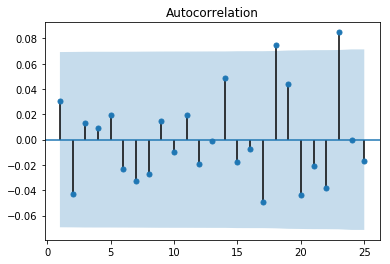

In [14]:
model = smt.ARMA(sampledata["Facebook"], order=(1,1))
model_fit = model.fit(disp=0, method='mle', solver='nm')
print(model_fit.summary())

data_acfplot = tsa.plot_acf(x=model_fit.resid, ax=None, 
                            lags=25, alpha=.05, use_vlines=True, 
                            unbiased=False,fft=False, zero=False,
                            vlines_kwargs=None)

ARMA(1,1) is best and therefore tomorrow's data only depends on today's. Plot ACF on the residual to model check. The serila correlation is really low and no trend so it provides evidence that each reisdual is independent of each other.

series is adjusted to mean, the AR portion suggests that after significant spikes, the web traffic will slowly decrease overtime to the mean. You take the 95% of the first data and then 95% of that again. 95% comes from the coefficient. Can talk about how after the spike, the series goes down.

for MA with negative coefficient means that the previous day would have an opposite effect on the next day as seen in the jaggedness of the series.

In [15]:
table = [["Model","AIC","BIC"],
         ["ARMA(0,0)",7644.129,7653.498],
         ["MA(1)",7565.164,7579.218],
         ["MA(2)",7543.781,7562.781],
         ["MA(3)",7522.786,7546.209],
         ["MA(4)",7507.885,7535.993],
         ["MA(5)",7492.126,7524.919],
         ["AR(1)",7533.897,7547.951],
         ["AR(2)",7506.299,7525.037],
         ["AR(3)",7478.710,7502.133],
         ["AR(4)",7466.529,7494.637],
         ["AR(5)",7458.583,7491.375],
         ["ARMA(1,1)",7447.300,7466.039],
         ["ARMA(1,2)",7447.836,7471.259],
         ["ARMA(1,3)",7449.007,7477.114],
         ["ARMA(1,5)",7452.512,7489.989],
         ["ARMA(2,1)",7447.964,7471.387],
         ["ARMA(2,2)",7448.713,7476.821],
         ["ARMA(2,5)",7454.635,7496.796],
         ["ARMA(3,1)",7449.049,7477.157],
         ["ARMA(3,5)",7456.112,7502.958],
         ["ARMA(4,5)",7452.134,7503.665],
         ["ARMA(5,5)",7453.500,7509.716]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Model,AIC,BIC
"ARMA(0,0)",7644.129,7653.498
MA(1),7565.164,7579.218
MA(2),7543.781,7562.781
MA(3),7522.786,7546.209
MA(4),7507.885,7535.993
MA(5),7492.126,7524.919
AR(1),7533.897,7547.951
AR(2),7506.299,7525.037
AR(3),7478.71,7502.133
AR(4),7466.529,7494.637


(array([62.14503317, 61.69676194, 61.27184051, 60.86905262, 60.48724537,
       60.12532591, 59.78225831, 59.4570606 , 59.14880198, 58.8566001 ,
       58.5796186 , 58.31706466, 58.06818678, 57.83227258, 57.60864682,
       57.3966694 , 57.19573358, 57.00526421, 56.82471612, 56.65357252,
       56.49134354, 56.33756483, 56.19179624, 56.05362052, 55.92264217,
       55.7984863 , 55.68079753, 55.56923899, 55.46349138, 55.36325201,
       55.26823396, 55.17816527, 55.09278812, 55.01185815, 54.9351437 ,
       54.8624252 , 54.79349449, 54.72815429, 54.66621757, 54.60750704,
       54.55185466, 54.49910112, 54.44909545, 54.4016945 , 54.35676259,
       54.31417112, 54.27379819, 54.23552821, 54.19925167, 54.16486472,
       54.13226894, 54.10137102, 54.07208253, 54.04431964, 54.01800287,
       53.99305691, 53.96941035, 53.9469955 , 53.92574821, 53.90560766,
       53.8865162 , 53.86841919, 53.85126482, 53.835004  , 53.81959019,
       53.80497926, 53.79112939, 53.77800094, 53.76555633, 53.7

Text(0,0.5,'Daily Visits')

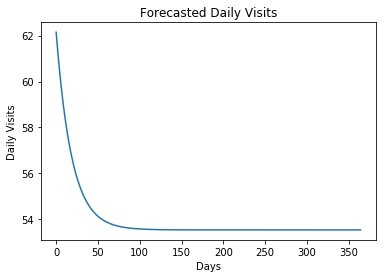

In [16]:
facebookforecast = model_fit.forecast(steps=365)
print(facebookforecast)
plt.plot(facebookforecast[0])
plt.title("Forecasted Daily Visits")
plt.xlabel("Days")
plt.ylabel("Daily Visits")


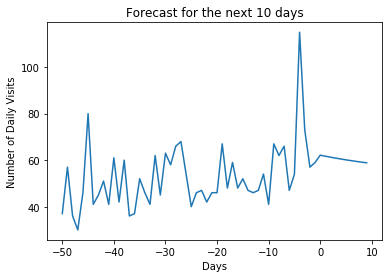

In [25]:
training_array = sampledata["Facebook"]
forecast, stderr, ci = model_fit.forecast(steps=10, alpha=0.1) 
values_line = np.r_[training_array[-50:], forecast] 
x_points = np.arange(-50, 10) 
plt.plot(x_points, values_line) 
# plt.fill_between(np.arange(10), ci[:,0], ci[:,1], alpha=0.3)
plt.title("Forecast for the next 10 days")
plt.xlabel("Days")
plt.ylabel("Number of Daily Visits")
plt.show()